<a href="https://colab.research.google.com/github/angelelliott/spotify-api-song-recs/blob/main/Spotify_API_song_recs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am always listening to music. I love anything guitars, high-production value, and poetic lyricism. Some of my favorite musicians are Kurt Vile (prodigious guitarist), Kehlani (hopeless romantic with killer beats), and Courtney Barnett (poet).

Given my affinity to the melody, I regularly use Spotify. Spotify gathers insights from users' data to improve their algorithm, so I will use the Spotify API to discover trends in my usage history.


Logging into the Spotify API

In [ ]:
# Spotipy is a library that facilitates our access to the Spotify Web API.
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 5.9 MB/s eta 0:00:00


In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/keys.py' .

# import necessary libraries
import keys # my client id and secret keys are saved in a separate file
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
cid = keys.clientID
secret = keys.clientSecret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
scope =  ["playlist-modify-public","user-top-read"]
redirect_uri = 'https://github.com/daliarod96/'


#Access Spotify
sp = spotipy.Spotify(oauth_manager=SpotifyOAuth(scope=scope, client_id = cid, client_secret = secret, redirect_uri = redirect_uri, open_browser=False))
#spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Gather data about my top artists, tracks and genres.

In [ ]:
# my top artists (short_term = 4 weeks, medium_term = 6 months, long_term = years)
results = sp.current_user_top_artists(limit=20, time_range = 'long_term' )
top_artists = results['items']

Go to the following URL: https://accounts.spotify.com/authorize?client_id=393f02d4d8d64f5f8067bdb41ca0750f&response_type=code&redirect_uri=https%3A%2F%2Fgithub.com%2Fdaliarod96%2F&scope=playlist-modify-public+user-top-read
Enter the URL you were redirected to: https://github.com/daliarod96/?code=AQBQQp-dnz1z6PVrJlzNsykoSUu8P9U45b9MHLjp-4Fkuya3rfRYg0MkpBPIyHTVEKnnKb7-FNrNOP89QPfoEi6XTPQm9d4vU8ueYzXy5iVL1d6QZ1csQLoYkDPcKoUMqxiQPn8r2F3dwtu-6F6rmTNfpqz7CwMc56CtjZiUSbouCGYlrfxVi9DR8AfNKKT_RYdqa1i5MU7urPapPx5Q0GXwtYhTZ1vzPg


In [ ]:
print('My top artists of all time are:')
for i, artist in enumerate(top_artists):
  print(f'{i+1}.', artist['name'])
  #artist_genres[artist['name']] = artist['genres']
  #artist_popularity[artist['name']] = artist['popularity']


My top artists of all time are:
1. Courtney Barnett
2. Bright Eyes
3. Kehlani
4. Doja Cat
5. Kurt Vile
6. Sufjan Stevens
7. Elliott Smith
8. Mitski
9. Megan Thee Stallion
10. Sharon Van Etten
11. Florence + The Machine
12. SZA
13. ROSALÍA
14. Kacey Musgraves
15. The War On Drugs
16. Warpaint
17. Arctic Monkeys
18. Japanese Breakfast
19. Sleater-Kinney
20. Phoebe Bridgers


In [ ]:
# my top artists medium term
results = sp.current_user_top_artists(limit=20, time_range = 'medium_term' )
top_artists = results['items']
print('My top artists in the last 6 months:')
for i, artist in enumerate(top_artists):
  print(f'{i+1}.', artist['name'])
  #artist_genres[artist['name']] = artist['genres']
  #artist_popularity[artist['name']] = artist['popularity']


My top artists in the last 6 months:
1. Kurt Vile
2. The War On Drugs
3. Courtney Barnett
4. Kehlani
5. Kanye West
6. ROSALÍA
7. Arca
8. Kendrick Lamar
9. Ice Spice
10. Silver Jews
11. Ariana Grande
12. Tokischa
13. 070 Shake
14. Omar Apollo
15. Weyes Blood
16. SZA
17. Doja Cat
18. King Gizzard & The Lizard Wizard
19. Tyler, The Creator
20. Jessie Ware


In [ ]:
artist_genres = {}
artist_popularity = {}
artist_uri = {}

# my top artists in the last 4 weeks
results = sp.current_user_top_artists(limit=20, time_range = 'short_term' )
top_artists = results['items']
print('My top artists in the last 4 weeks:')
for i, artist in enumerate(top_artists):
  print(f'{i+1}.', artist['name'])
  artist_genres[artist['name']] = artist['genres']
  artist_popularity[artist['name']] = artist['popularity']
  artist_uri[artist['name']] = artist['uri']

My top artists in the last 4 weeks:
1. Kurt Vile
2. 070 Shake
3. Tokischa
4. Ice Spice
5. Kehlani
6. The War On Drugs
7. Japanese Breakfast
8. FRNCE
9. Jen Cloher
10. Arca
11. Courtney Barnett
12. Whitney Houston
13. James Blake
14. Sudan Archives
15. Arc De Soleil
16. Omar Apollo
17. Frank Ocean
18. Allah-Las
19. Faye Webster
20. ROSALÍA


The first thing I notice is how much my streaming of Courtney Barnett's music has decreased over time. She used to be my #1 favorite and today she takes a spot in the lower half of my top artists. I have dug deep into Kurt Vile's music in the last year, reflected by the fact that he has been my top artist for 6 months.

I'm surprised that FRNCE, Whitney Houston, and Jen Cloher made it into my top artists for this past month. I have only streamed their music once or twice. I also do not know who Arc De Soleil is. Either I am not using Spotify often enough or I am not discovering new artists to obsess over. I lean towards the latter, as my partner often teases me that I always listen to the same four albums. Needless to say, I am in dire need of some music recommendations.  

Spotify provides information about each artist's popularity and genres. Popularity is a number between 0 - 100 that represents the average popularity of all the artist's tracks. Popularity for a given track is calculated by the Spotify algorithm and is based mostly on the total number of plays the track has had and how recent those plays are.

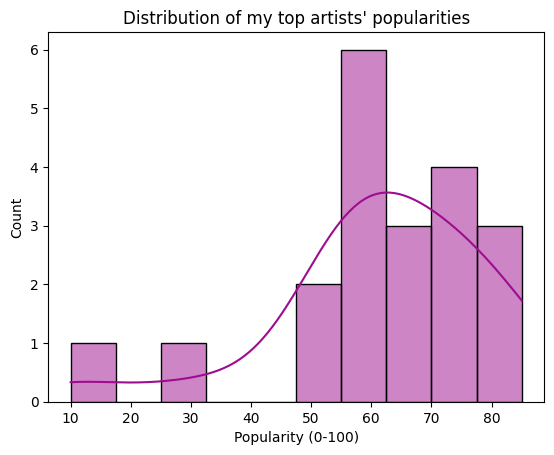

In [ ]:
# Gather genre and popularity data into a dataframe
# I'm only doing this for short term top artists since that best reflects my musical interests at this point in time.
df = pd.DataFrame({'artist': artist_genres.keys(), 'genres': artist_genres.values(), 'popularity': artist_popularity.values(), 'uri': artist_uri.values()})
pd.set_option('display.max_colwidth', None)

ax = sns.histplot(df['popularity'], kde=True, bins=10, color = '#9E0C8F')
ax.set_title('Distribution of my top artists\' popularities')
ax.set_xlabel('Popularity (0-100)')
plt.show()

In [ ]:
print('My top genres in the last 4 weeks:')
df[['artist','genres']]

My top genres in the last 4 weeks:


,artist,genres
0,Kurt Vile,"[alternative rock, art pop, chamber pop, indie rock, modern folk rock, neo-psychedelic, noise pop, philly indie, singer-songwriter, stomp and holler]"
1,070 Shake,[new jersey rap]
2,Tokischa,"[rap latina, trap dominicano]"
3,Ice Spice,[bronx drill]
4,Kehlani,"[pop, r&b]"
5,The War On Drugs,"[chamber pop, indie rock, modern rock, philly indie]"
6,Japanese Breakfast,"[art pop, eugene indie, indie pop, indie rock, philly indie]"
7,FRNCE,[]
8,Jen Cloher,"[australian indie, melbourne indie]"
9,Arca,"[ai, art pop, deconstructed club, escape room, experimental pop, fluxwork]"


Given that I need some new music recommendations, I will begin by taking a look at existing playlists that Spotify thinks I might be interested in.

In [ ]:
results = sp.featured_playlists(limit=10)
uri = {}
print('Featured playlists:')
for i, playlist in enumerate(results['playlists']['items']):
  print(f'{i+1}. Name:', playlist['name'])
  print(' Description:', playlist['description'])
  uri[playlist['name']] = playlist['uri']

Featured playlists:
1. Name: New Music Friday
 Description: New music from The Weeknd, Metro Boomin, Toosii, Bizarrap & Peso Pluma, Karol G, Foo Fighters, Gunna and more!
2. Name: Channel-X
 Description: Where Hip-Hop, Afro-Fusion & Pop meet R&B !  Cover: Burna Boy
3. Name: Internet People
 Description: The soundtrack to the internet. Cover: Lil Mabu
4. Name: Baila Reggaeton
 Description: Reggaeton hits from Young Miko, KAROL G, Feid and more.🔥🥵
5. Name: Country Cookout
 Description: The perfect soundtrack recipe for a backyard barbecue! 
6. Name: Most Necessary
 Description: The official voice of the next generation. Cover: <a href="spotify:artist:1YRqgFNXqRyMDRr8ClS1NL">Kali</a>
7. Name: Front Page Indie
 Description: Newsworthy indie of 2023. Arlo Parks drops her sophomore album. 
8. Name: Varsity Bars
 Description: A little bit of pop, a little bit of rap. Cover: Felly
9. Name: Dance Pop Hits
 Description: Hit the dance floor with your favorite bops!
10. Name: Rock Party
 Descripti

I can already tell that I am not going to like these playlists. For one, I do not listen to pop music very often so I probably will not love the Dance Pop Hits playlist (#9). Let us take a closer look at some of these playlists.

In [ ]:
results = sp.playlist(playlist_id =uri['Dance Pop Hits'])

print(f'First 20 songs in the Dance Pop Hits playlist.')
for i, track in enumerate(results['tracks']['items'][0:20]):
  print(f'{i+1}.', track['track']['name'])
  print('   by:', ', '.join([x['name'] for x in track['track']['artists']]))

First 20 songs in the Dance Pop Hits playlist.
1. Latch
   by: Disclosure, Sam Smith
2. More Than A Woman - SG's Paradise Edit
   by: Bee Gees, SG Lewis
3. You
   by: Regard, Troye Sivan, Tate McRae
4. Sexual
   by: NEIKED, Dyo
5. Baby Don't Hurt Me
   by: David Guetta, Anne-Marie, Coi Leray
6. Best Friend
   by: Sofi Tukker, NERVO, The Knocks, ALISA UENO
7. Whistle (feat. Calum Scott)
   by: Jax Jones, Calum Scott
8. Electricity (with Dua Lipa)
   by: Silk City, Dua Lipa, Diplo, Mark Ronson
9. Better Days (NEIKED x Mae Muller x Polo G)
   by: NEIKED, Mae Muller, Polo G
10. Moth To A Flame (with The Weeknd)
   by: Swedish House Mafia, The Weeknd
11. Nothing Breaks Like a Heart (feat. Miley Cyrus)
   by: Mark Ronson, Miley Cyrus
12. Sweet Nothing (feat. Florence Welch)
   by: Calvin Harris, Florence Welch
13. Rain On Me (with Ariana Grande)
   by: Lady Gaga, Ariana Grande
14. About Damn Time - Purple Disco Machine Remix
   by: Lizzo, Purple Disco Machine
15. Maybe You’re The Problem
   

I have not listened to Troye Sivan, David Guetta, or Katy Perry since I was a teenager. Pass.

Now let us verify if the Most Necessary playlist lives up to its name.

In [ ]:
results = sp.playlist(playlist_id =uri['Most Necessary'])

print(f'First 20 songs in the Most Necessary playlist.')
for i, track in enumerate(results['tracks']['items'][0:20]):
  print(f'{i+1}.', track['track']['name'])
  print('   by:', ', '.join([x['name'] for x in track['track']['artists']]))

First 20 songs in the Most Necessary playlist.
1. WISH I COULD TELL YOU
   by: SoFaygo, DD Osama
2. Area Codes
   by: Kali
3. I'm Geekin (feat. Luh Tyler)
   by: DDG, Luh Tyler
4. NO BAP
   by: LUCKI
5. WTF (feat. Polo G) - Remix
   by: Hotboii, Polo G
6. Whip It
   by: BigXthaPlug
7. First Show
   by: Luh Tyler
8. Neck of the Woods
   by: Real Boston Richey
9. Pound Town 2 (feat. Nicki Minaj & Tay Keith)
   by: Sexyy Red, Nicki Minaj, Tay Keith
10. My Image
   by: Real Boston Richey
11. Leave Her
   by: LUCKI
12. Off The Court (with Polo G & Einer Bankz)
   by: SleazyWorld Go, Polo G, Einer Bankz
13. Favorite Song (feat. Future) [Toxic Version]
   by: Toosii, Future
14. No Love Shemix
   by: Flo Milli, Trina, Maiya The Don, J.K. Mac
15. GOMD (Remix) [feat. Lil Uzi Vert]
   by: Veeze, Lil Uzi Vert
16. Princess Diana (with Nicki Minaj)
   by: Ice Spice, Nicki Minaj
17. DRACULA
   by: Kenny Mason
18. OFF THE PORCH (feat. BigXthaPlug & Maxo Kream)
   by: Mike Dimes, BigXthaPlug, Maxo Krea

I do not know most of these artists, except for Ice Spice, Nicki Minaj, and Latto. Although I love Ice Spice, I think all of her music sounds the same and it is always about the same topic. I never got into Nicki Minaj and I think Latto is kind of corny. I do not think I will be a fan of this playlist. Pass.
</br>
</br>
Clearly, I do not like any of the featured playlists that Spotify has chosen for me to explore. Luckily for me, the Spotify API provides a list of recommended tracks given one to five seeds (artists, genres, or tracks). I am going to recommend myself music using my top 5 tracks in the last four weeks as seeds.

In [ ]:
results = sp.current_user_top_tracks(limit=50, offset=0, time_range='short_term')
tracks = results['items']

top_tracks_uri = {}

print('My top 5 tracks in the last four weeks are:')
for i, track in enumerate(tracks[0:5]):
  print(f'{i+1}.', track['name'],   'by', ', '.join([x['name'] for x in track['artists']]))
  top_tracks_uri[track['name']] = track['uri']
for track in tracks:
  top_tracks_uri[track['name']] = track['uri']

My top 5 tracks in the last four weeks are:
1. Can I by Kehlani
2. Wakin On A Pretty Day by Kurt Vile
3. Princess Diana (with Nicki Minaj) by Ice Spice, Nicki Minaj
4. Say the Word by Kurt Vile
5. An Ocean In Between The Waves by The War On Drugs


In [ ]:
# Get recommendations
results = sp.recommendations(seed_tracks=list(top_tracks_uri.values())[0:5], limit=50)
rec_uris = {}
for i,track in enumerate( results['tracks']):
   print(f'{i+1}.', track['name'],   'by', ', '.join([x['name'] for x in track['artists']]))
   rec_uris[track['name']] = track['uri']

1. Fountain of Good Fortune by Rolling Blackouts Coastal Fever
2. The Way (feat. Chance the Rapper) by Kehlani, Chance the Rapper
3. Fire by SiR
4. Uh Huh by Bktherula
5. Before You Gotta Go by Courtney Barnett
6. B.I.T.C.H. by Megan Thee Stallion
7. everything by Kehlani
8. London Thunder by Foals
9. I Am My Mother by Wilco
10. Way We Won't by Grandaddy
11. Pity by KAYWHT
12. Talking Straight by Rolling Blackouts Coastal Fever
13. Cupid's Curse (feat. Kehlani) by Phora, Kehlani
14. Love You Too Much by Lucky Daye
15. Liar by Built To Spill
16. Too Much by Lakeyah
17. Snakeskin by Deerhunter
18. Fantasy (feat. Don Toliver) by Kali Uchis, Don Toliver
19. Twerkulator by City Girls
20. Forgive Me by Chloe x Halle
21. Best Friend (feat. Doja Cat) by Saweetie, Doja Cat
22. Emotional Eternal by Melody's Echo Chamber
23. Hints by Wilco
24. All I Know by Washed Out
25. Trust by Brent Faiyaz
26. Let Me Get There by Hope Sandoval & The Warm Inventions, Kurt Vile
27. 1st Position by Kehlani
28. W

These recommendations are mix of songs and artists I have never heard before with songs by my top artists (Kurt Vile, Courtney Barnett, War On Drugs, Kehlani, Doja Cat). I will save the songs into a playlist.

In [ ]:
playlist = sp.user_playlist_create(user = 'likesonicboom', name='my spotify recs', public=True)
playlist.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [ ]:
sp.playlist_add_items(playlist_id=playlist['id'], items=list(rec_uris.values()), position=None)

I want to further tailor my playlist to my favorite songs. Spotify provides the following audio features per track:
* duration (in milliseconds)
* danceability
* energy
* key
* loudness
* mode
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* time_signature



In [ ]:
df_top_tracks = pd.DataFrame({'track': list(top_tracks_uri.keys()), 'uri': list(top_tracks_uri.values()) })

In [ ]:
duration = []
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
time_signature = []

for uri in df_top_tracks['uri']:
  results = sp.audio_features(uri)[0]
  duration.append(results['duration_ms'])
  danceability.append(results['danceability'])
  energy.append(results['energy'])
  key.append(results['key'])
  loudness.append(results['loudness'])
  mode.append(results['mode'])
  speechiness.append(results['speechiness'])
  acousticness.append(results['acousticness'])
  instrumentalness.append(results['instrumentalness'])
  liveness.append(results['liveness'])
  valence.append(results['valence'])
  tempo.append(results['tempo'])
  time_signature.append(results['time_signature'])

In [ ]:
# Add audio features to df_top_tracks
df_top_tracks['duration'] = duration
df_top_tracks['danceability'] = danceability
df_top_tracks['energy']= energy
df_top_tracks['key'] = key
df_top_tracks['loudness'] = loudness
df_top_tracks['mode'] = mode
df_top_tracks['speechiness'] = speechiness
df_top_tracks['acousticness'] = acousticness
df_top_tracks['instrumentalness'] = instrumentalness
df_top_tracks['liveness'] = liveness
df_top_tracks['valence'] = valence
df_top_tracks['tempo'] = tempo
df_top_tracks['time_signature'] = time_signature

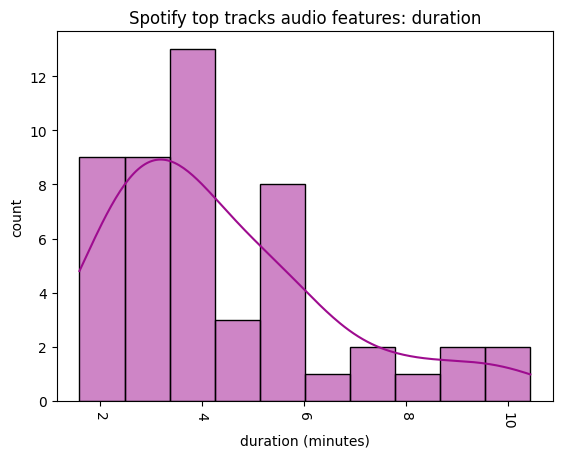

In [ ]:
ax = sns.histplot(data= df_top_tracks['duration']/60000, kde=True, bins=10, color = '#9E0C8F' )
ax.set_title("Spotify top tracks audio features: duration")
ax.set_xlabel('duration (minutes)')
ax.set_ylabel("count")
plt.xticks(rotation=-90)
plt.show()

On average, my favorite songs are 3-4 minutes but I am not opposed to longer songs, as seen by the 10 minute track in my favorites.

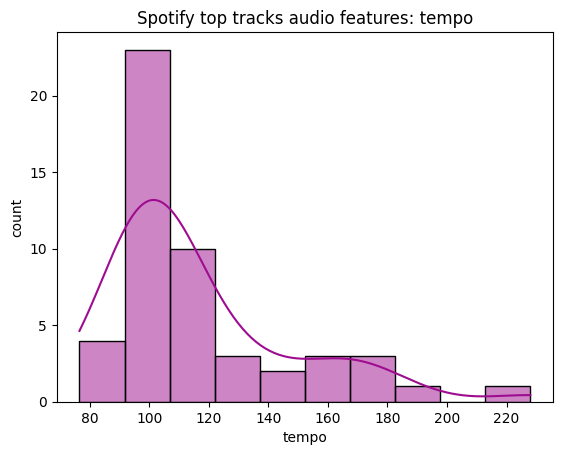

In [ ]:
ax = sns.histplot(data= df_top_tracks['tempo'], kde=True, bins=10, color = '#9E0C8F' )
ax.set_title("Spotify top tracks audio features: tempo")
ax.set_xlabel('tempo')
ax.set_ylabel("count")
plt.show()

About half of my top songs have a tempo of 100 to 200.

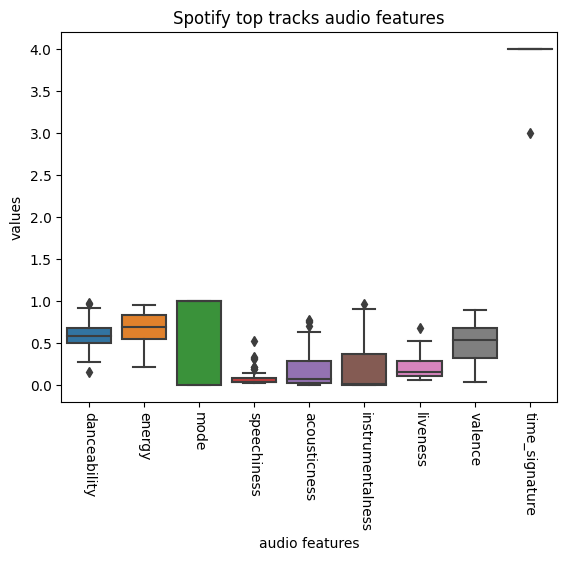

In [ ]:
ax = sns.boxplot(data= df_top_tracks.loc[:, (df_top_tracks.columns!= 'duration') & (df_top_tracks.columns!= 'tempo') & (df_top_tracks.columns!= 'key') & (df_top_tracks.columns!= 'loudness')])
ax.set_title("Spotify top tracks audio features")
ax.set_xlabel('audio features')
ax.set_ylabel("values")
plt.xticks(rotation=-90)
plt.show()

My preferred music is generally energetic music. Valence is defined as, "a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)." Based on this definition, it appears like I tend to listen to music that is on average neutral to positive.

All of my songs except for one use the 4/4 time signature.

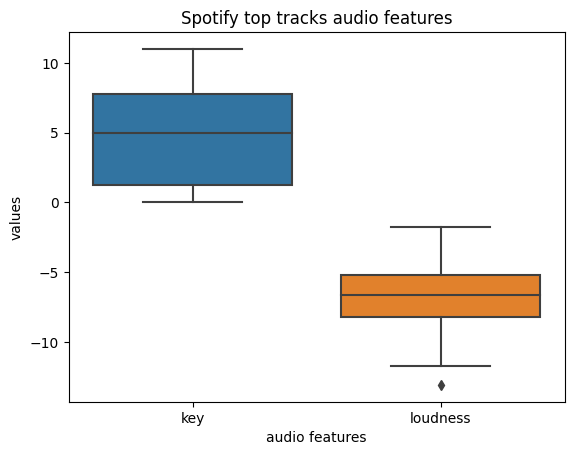

In [ ]:
ax = sns.boxplot(data= df_top_tracks[['key','loudness']])
ax.set_title("Spotify top tracks audio features")
ax.set_xlabel('audio features')
ax.set_ylabel("values")
plt.show()

Now that we have taken a quick look at Spotify's audio features, I am going to use these to improve my song recommendation playlist by further filtering songs to my style using cosine similarity. The cosine similarity is a metric that can tell us how similar two vectors are to each other. It calculates cosine of the angle between two vectors. The closer the result is to 1, the more similar the vectors are to each other.

In [ ]:
# I will begin by saving the 'my spotify recs' playlist into a dataframe
df_recs = pd.DataFrame({'track': list(rec_uris.keys()), 'uri': list(rec_uris.values())})

duration = []
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
time_signature = []

for uri in df_recs['uri']:
  results = sp.audio_features(uri)[0]
  duration.append(results['duration_ms'])
  danceability.append(results['danceability'])
  energy.append(results['energy'])
  key.append(results['key'])
  loudness.append(results['loudness'])
  mode.append(results['mode'])
  speechiness.append(results['speechiness'])
  acousticness.append(results['acousticness'])
  instrumentalness.append(results['instrumentalness'])
  liveness.append(results['liveness'])
  valence.append(results['valence'])
  tempo.append(results['tempo'])
  time_signature.append(results['time_signature'])

# Add audio features to df_recs
df_recs['duration'] = duration
df_recs['danceability'] = danceability
df_recs['energy']= energy
df_recs['key'] = key
df_recs['loudness'] = loudness
df_recs['mode'] = mode
df_recs['speechiness'] = speechiness
df_recs['acousticness'] = acousticness
df_recs['instrumentalness'] = instrumentalness
df_recs['liveness'] = liveness
df_recs['valence'] = valence
df_recs['tempo'] = tempo
df_recs['time_signature'] = time_signature

In [ ]:
print(f"Our recommendations playlist is starting out with {len(df_recs)} songs.")

Our recommendations playlist is starting out with 100 songs.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

def create_similarity_score(df1,df2,similarity_score = "cosine_sim"):
  assert list(df1.columns[2:]) == list(df2.columns[2:]), "dataframes need to contain the same columns"
  features = list(df1.columns[2:])
  df_features1,df_features2 = df1[features],df2[features]
  scaler = MinMaxScaler()
  df_features_scaled1,df_features_scaled2 = scaler.fit_transform(df_features1),scaler.fit_transform(df_features2)
  if similarity_score == "linear":
      linear_sim = linear_kernel(df_features_scaled1, df_features_scaled2)
      return linear_sim
  elif similarity_score == "cosine_sim":
      cosine_sim = cosine_similarity(df_features_scaled1, df_features_scaled2)
      return cosine_sim

#create similarity scoring between playlist and recommendations
similarity_score = create_similarity_score(df_top_tracks,df_recs)
#get a filtered recommendations df
final_recomms = df_recs.iloc[[np.argmax(i) for i in similarity_score]]
final_recomms = final_recomms.drop_duplicates()
#filter again so tracks are not already in df_top_tracks
final_recomms = final_recomms[~final_recomms["track"].isin(df_top_tracks["track"])]
final_recomms.reset_index(drop = True, inplace = True)

In [ ]:
final_recomms

,track,uri,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Pity,spotify:track:5SZkbEwBKLbAPhAYYmA1rI,146286,0.596,0.558,0,-7.454,1,0.0412,0.69400,0.000021,0.0860,0.4990,104.842,4
1,Emotional Eternal,spotify:track:6d1M1R1EcM07juyUwDuAMi,226493,0.637,0.704,8,-6.491,1,0.0308,0.02640,0.537000,0.1040,0.4890,95.016,4
2,Trust,spotify:track:0oufSLnKQDoBFX5mgkDCgR,158421,0.764,0.394,8,-8.559,1,0.1520,0.23100,0.000094,0.1170,0.4650,92.009,4
3,Freazy,spotify:track:19WfbfP4sZEk44d4KZtHPx,194840,0.659,0.776,0,-7.896,1,0.0331,0.00142,0.009430,0.3500,0.5860,112.011,4
4,Everest,spotify:track:6NorO8SVLXBm6Dd9gC8QhF,227920,0.584,0.843,3,-6.463,1,0.0279,0.00434,0.399000,0.3600,0.3890,141.978,4
5,Birch Tree,spotify:track:0BPKqNWOKQam19tKWoZQwu,261133,0.659,0.792,6,-7.101,0,0.0301,0.01860,0.040700,0.1020,0.4670,108.011,4
6,Occasional Rain,spotify:track:1nru4nURhOZruDe9hsAKte,294040,0.544,0.812,1,-6.073,0,0.0271,0.00933,0.001350,0.0652,0.5860,112.003,4
7,Cruel Country,spotify:track:6mMK7vzPwuel4Lta03w3d9,206240,0.706,0.637,5,-7.552,1,0.0246,0.11100,0.034900,0.3400,0.6440,111.924,4
8,nasty,spotify:track:0sci7ppTZFm4mjcH3nu8yO,200733,0.772,0.506,6,-6.558,0,0.1390,0.08140,0.000011,0.1820,0.4560,127.894,4
9,Cash Rules,spotify:track:7aLDeN4H4taVFvjOQSV2ge,250788,0.689,0.824,6,-2.674,1,0.1400,0.16300,0.000000,0.2190,0.5880,77.938,4


In [ ]:
print(f"After filtering using cosine similarity, our recommendations playlist ended up with {len(final_recomms)} songs.")

After filtering using cosine similarity, our recommendations playlist ended up with 32 songs.


I used cosine similarity to filter out 68 songs. I will be saving this new list of songs into a new playlist.

In [ ]:
playlist = sp.user_playlist_create(user = 'likesonicboom', name='my spotify recs (filtered)', public=True)
sp.playlist_add_items(playlist_id=playlist['id'], items=list(final_recomms['uri']), position=None)

Done!